Group - 12 <br>
EDA Project <br>
Topic Assigned - Telecom Sector <br>
Dataset used - Telco Customer Churn (IBM Cognos Analytics)<br>

Group Members : <br>
Preet Shah - 202411053 <br>
Neerav Sharma - 202312028

In [1]:
!git clone https://github.com/Preet28/EDA-Project-Group-12.git

Cloning into 'EDA-Project-Group-12'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), 291.32 KiB | 1.14 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Load the dataset
df = pd.read_csv('/content/EDA-Project-Group-12/Telco-Customer-Churn1.csv')
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5921,0068-FIGTF,Female,0,No,No,27.0,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Mailed check,78.20,2078.95,No
3001,4568-TTZRT,Male,0,No,No,9.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8,No
5928,1830-IPXVJ,Female,0,Yes,Yes,61.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.75,1311.6,No
1442,3253-HKOKL,Female,0,Yes,Yes,52.0,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,100.30,5244.45,No
677,0822-GAVAP,Female,0,No,No,2.0,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,34.70,62.25,Yes
4623,8755-IWJHN,Male,1,Yes,No,69.0,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.35,NaN,No
1781,2519-LBNQL,Male,1,Yes,No,60.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.35,6339.45,No
5827,3161-GETRM,Male,0,Yes,Yes,34.0,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),90.05,3097,No
1650,3049-NDXFL,Female,0,No,No,1.0,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,85.80,85.8,Yes
1000,8357-EQXFO,Female,0,No,No,7.0,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.35,660.9,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,6691.000000,6691.000000
mean,0.162147,32.364669,64.698236
std,0.368612,24.548930,30.087036
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.400000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            6691 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Missing Data Analysis

In [7]:
missing_data = df.isnull().sum()
missing_data

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,352
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
# Analyze missing data
print("Missing Data Analysis:")

missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage})
print(missing_df[missing_df['Missing Values'] > 0])

Missing Data Analysis:
                Missing Values  Percentage
tenure                     352     4.99787
MonthlyCharges             352     4.99787
TotalCharges               352     4.99787


In [9]:
from scipy.stats import chi2_contingency, ttest_ind
import missingno as msno

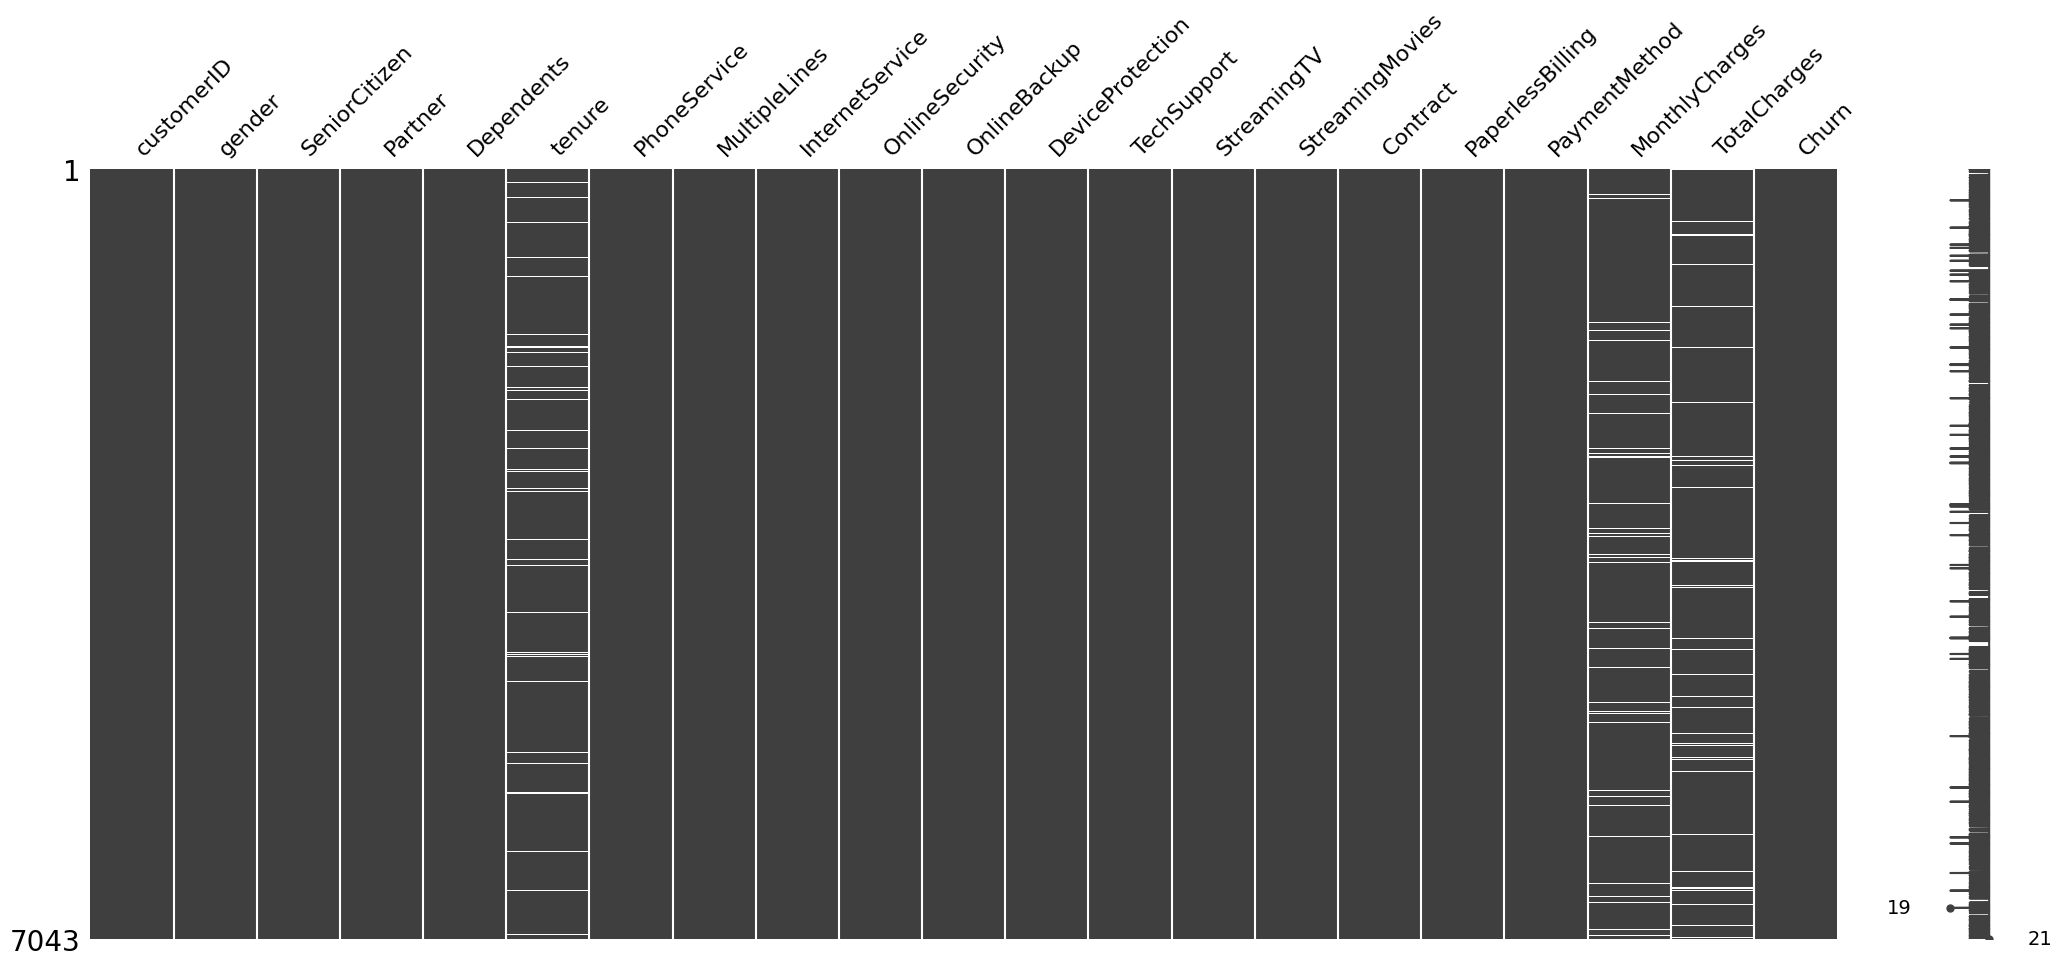

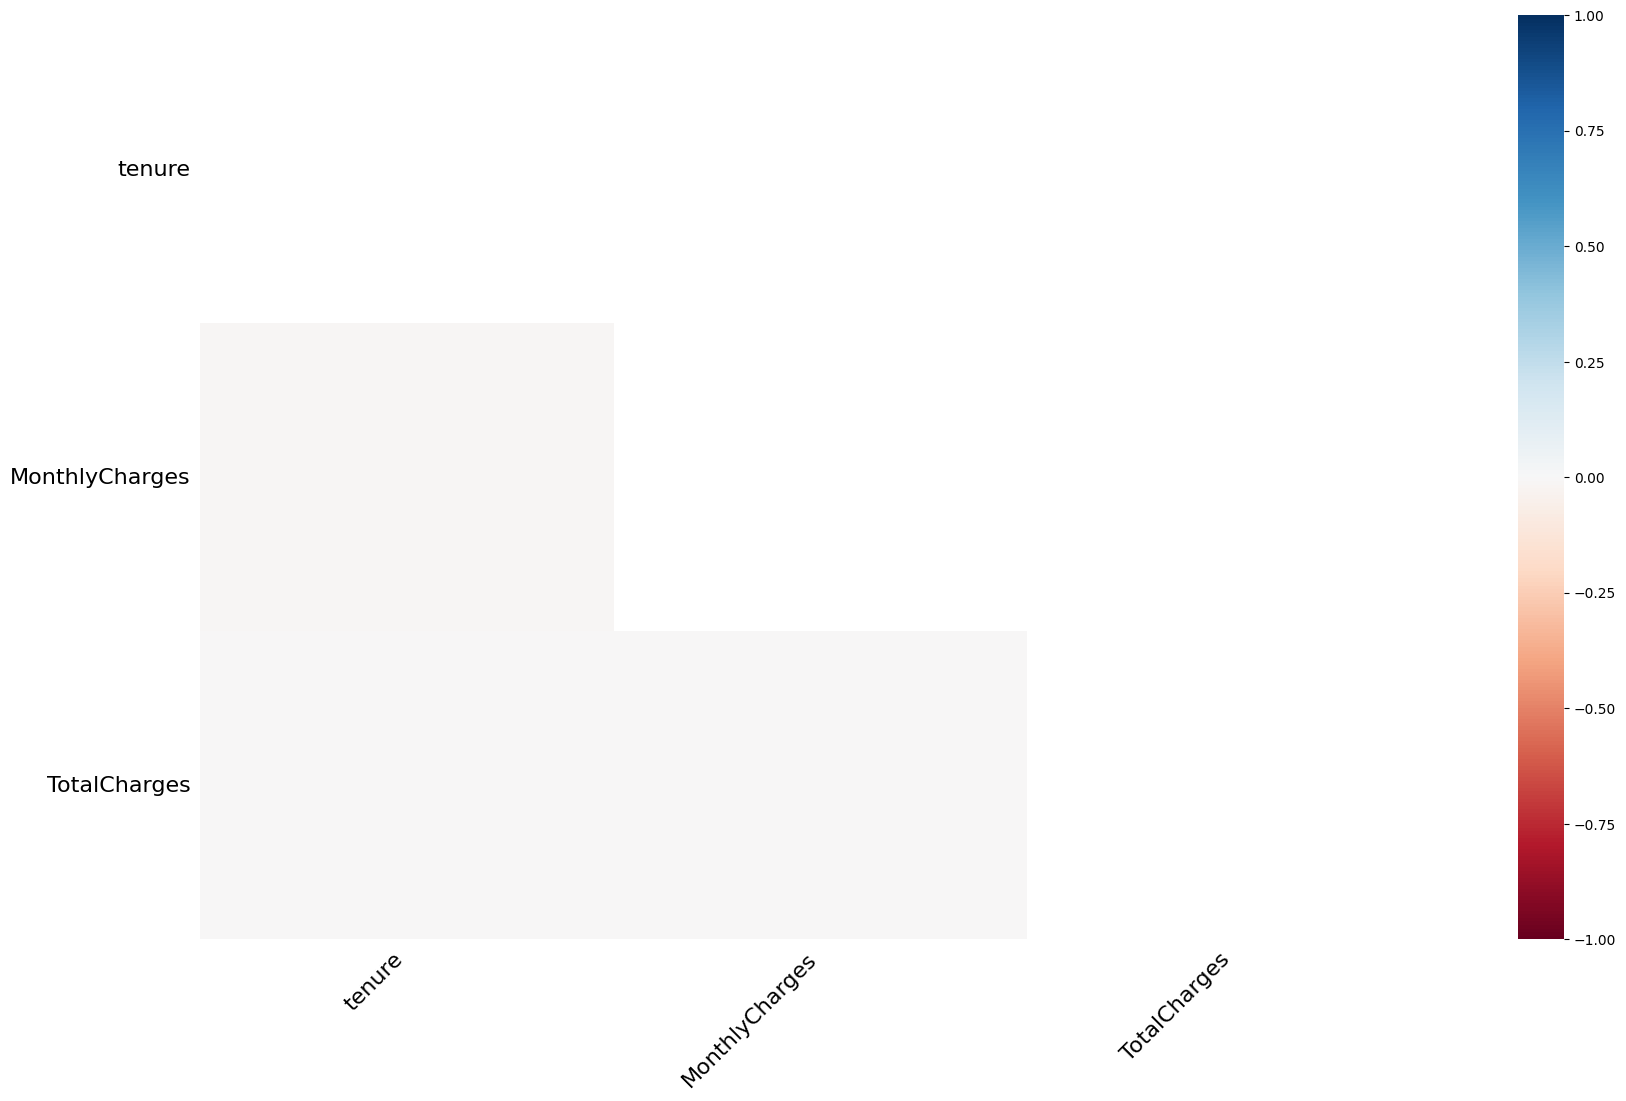

In [10]:
# Visualizing missing data pattern
msno.matrix(df)
msno.heatmap(df)
plt.show()

In [11]:
# 'Churn' column should be numeric for further analysis
print(df['Churn'].dtype)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Adjust this mapping as needed
print(df['Churn'].dtype)

object
int64


In [12]:
# Little's MCAR Test
try:
    from missingpy import LittleMCAR
    mcar_test = LittleMCAR()
    test_statistic, p_value = mcar_test.fit(df)
    print(f"\nLittle's MCAR Test: Test Statistic = {test_statistic}, p-value = {p_value}\n")
    if p_value > 0.05:
        print("The missing data is likely MCAR (p-value > 0.05).\n")
    else:
        print("The missing data is not MCAR (p-value <= 0.05).\n")
except ImportError:
    print("\nInstall `missingpy` library to perform Little's MCAR test.\n")



Install `missingpy` library to perform Little's MCAR test.



In [13]:
# NMAR Check: Correlation between missingness and target variable
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    if col in df.columns and df[col].isnull().any():
        # Create a boolean mask for missingness
        missing_mask = df[col].isnull()
        contingency_table = pd.crosstab(missing_mask, df['Churn'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"\nNMAR Check for '{col}': Chi-squared = {chi2}, p-value = {p}\n")
        if p < 0.05:
            print(f"The missingness in '{col}' is likely NMAR (p-value < 0.05).\n")
        else:
            print(f"The missingness in '{col}' is not strongly related to the target (p-value >= 0.05).\n")



NMAR Check for 'tenure': Chi-squared = 3.0451847126795233, p-value = 0.0809769034786298

The missingness in 'tenure' is not strongly related to the target (p-value >= 0.05).


NMAR Check for 'MonthlyCharges': Chi-squared = 0.3698290658283746, p-value = 0.543097456643405

The missingness in 'MonthlyCharges' is not strongly related to the target (p-value >= 0.05).


NMAR Check for 'TotalCharges': Chi-squared = 0.14644209201698483, p-value = 0.701958876968499

The missingness in 'TotalCharges' is not strongly related to the target (p-value >= 0.05).



In [14]:
# MAR Check: Compare distributions of observed and missing groups
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    if col in df.columns and df[col].isnull().any():
        # Observed group: rows where the column is not missing
        observed = df.loc[~df[col].isnull(), 'Churn']
        # Missing group: rows where the column is missing
        missing = df.loc[df[col].isnull(), 'Churn']

        # Perform t-test between observed and missing groups
        t_stat, p_value = ttest_ind(observed, missing, nan_policy='omit')
        print(f"\nMAR Check for '{col}': t-statistic = {t_stat}, p-value = {p_value}\n")
        if p_value < 0.05:
            print(f"The missingness in '{col}' is likely MAR (p-value < 0.05).\n")
        else:
            print(f"The missingness in '{col}' is not strongly related to MAR (p-value >= 0.05).\n")


MAR Check for 'tenure': t-statistic = -1.807133953789677, p-value = 0.07078406263392346

The missingness in 'tenure' is not strongly related to MAR (p-value >= 0.05).


MAR Check for 'MonthlyCharges': t-statistic = 0.6699877688867416, p-value = 0.5028875588049259

The missingness in 'MonthlyCharges' is not strongly related to MAR (p-value >= 0.05).


MAR Check for 'TotalCharges': t-statistic = -0.4445464658065158, p-value = 0.6566612057845076

The missingness in 'TotalCharges' is not strongly related to MAR (p-value >= 0.05).



Handling Missing Data

In [15]:
# Imputation (Filling missing values with the most frequent value)
from sklearn.impute import SimpleImputer

# Initialize the imputer
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing data
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Check if there are any missing values remaining after imputation
missing_after_imputation = df_imputed.isnull().sum().sum()
print(f"\nTotal missing values after imputation: {missing_after_imputation}\n")


Total missing values after imputation: 0



Univariate Analysis

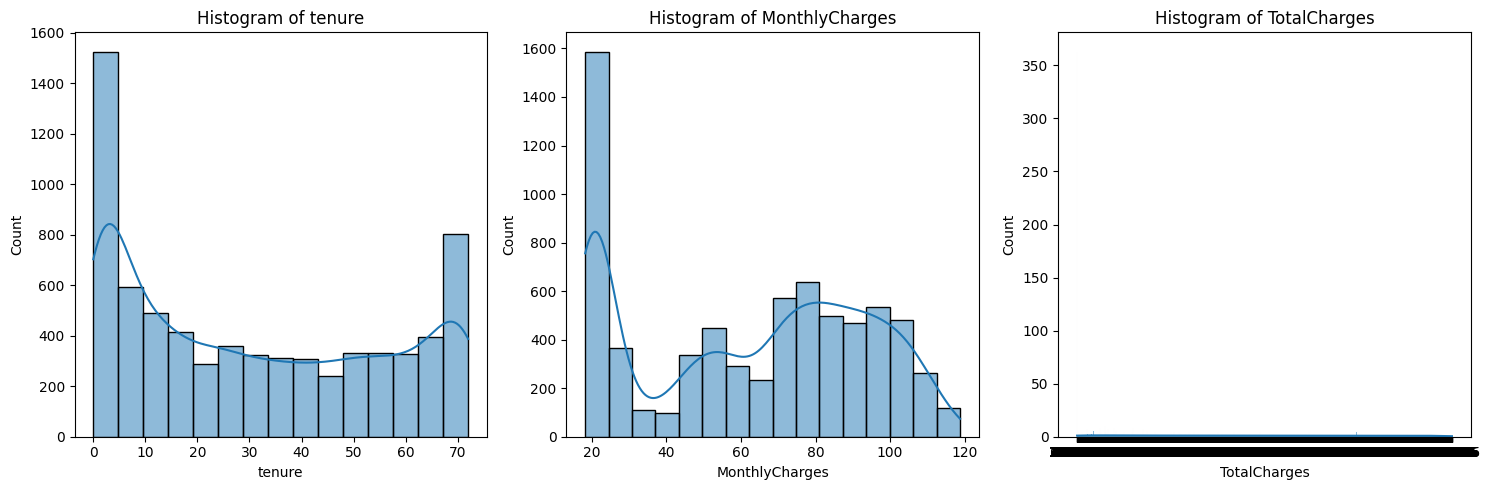

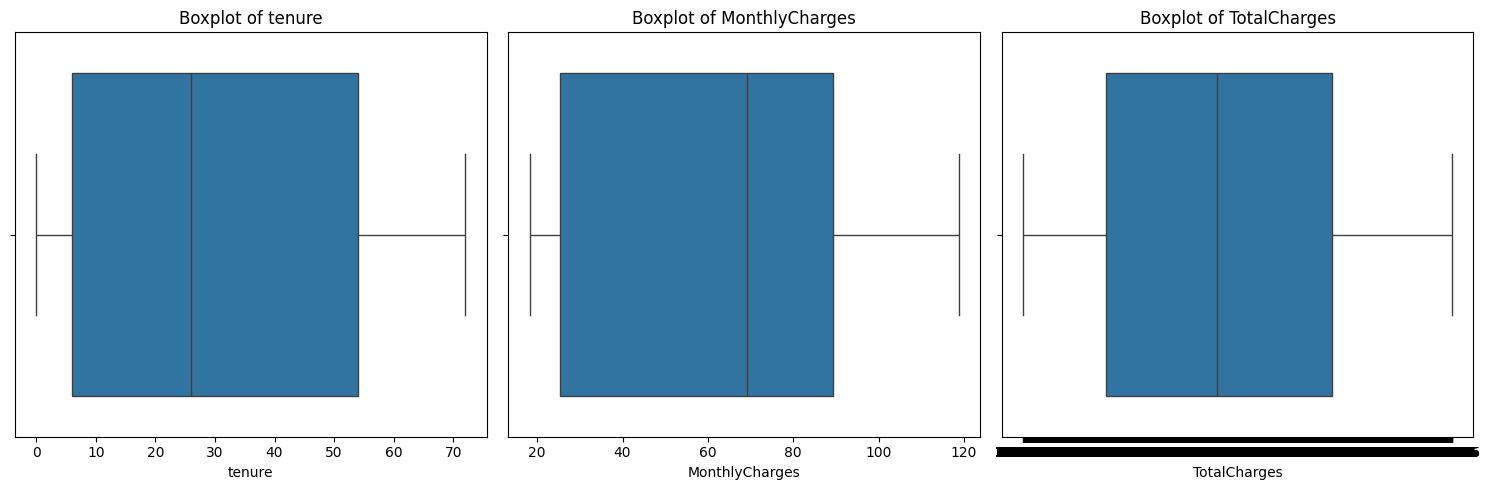

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Plotting histograms for numerical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_imputed[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
plt.show()

# Boxplots for numerical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df_imputed[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()


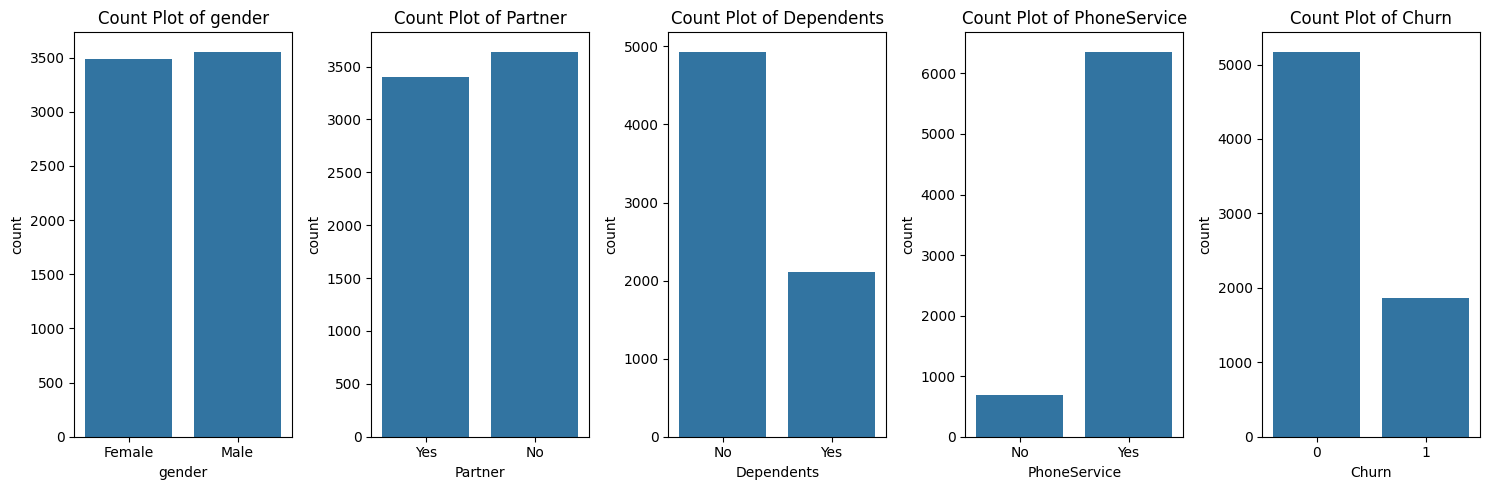

In [17]:
# Categorical columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'Churn']

# Plotting count plots for categorical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 5, i)
    sns.countplot(data=df_imputed, x=col)
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
plt.show()


Bivariate Analysis

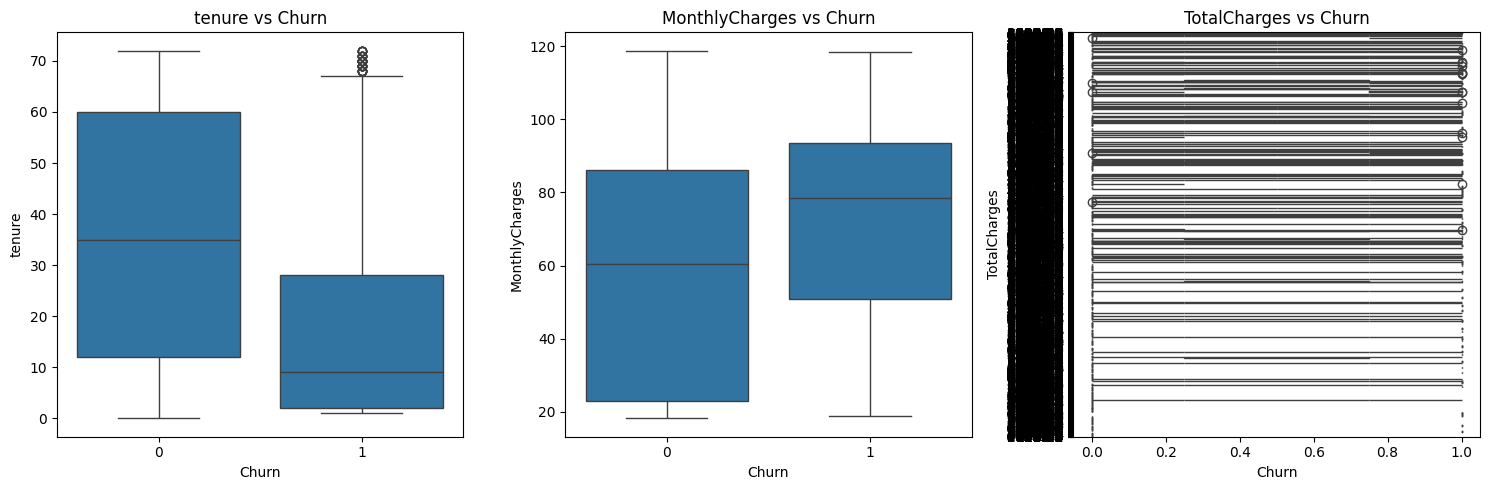

In [18]:
# Plotting box plots for numerical features against the target 'Churn'
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df_imputed['Churn'], y=df_imputed[col])
    plt.title(f'{col} vs Churn')
    plt.tight_layout()
plt.show()

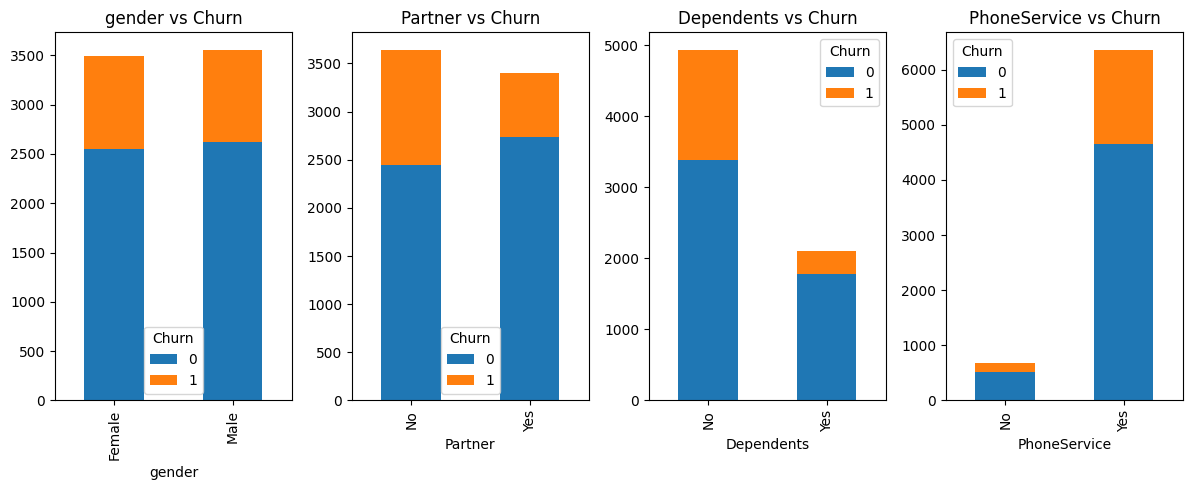

In [19]:
# Plotting stacked bar plots for categorical features against the target 'Churn'
plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_cols[:-1], 1):  # Excluding 'Churn' from the categorical list
    plt.subplot(1, 5, i)
    pd.crosstab(df_imputed[col], df_imputed['Churn']).plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'{col} vs Churn')
    plt.tight_layout()
plt.show()

In [20]:
# Imputed missing values for numerical columns with mean
for col in numerical_cols:
    df_imputed[col] = pd.to_numeric(df_imputed[col], errors='coerce')  # Convert to numeric
    df_imputed[col].fillna(df_imputed[col].mean(), inplace=True)  # Impute with mean


<ipython-input-20-38dcc34f2a8f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(df_imputed[col].mean(), inplace=True)  # Impute with mean


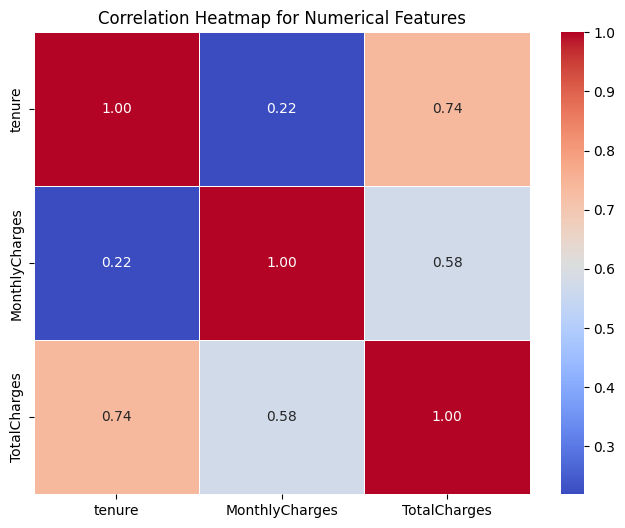

In [21]:
# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
corr_matrix = df_imputed[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Features")
plt.show()


In [22]:
df_imputed.shape

(7043, 21)

In [23]:
# One-hot encoding of categorical variables
df_encoded = pd.get_dummies(df_imputed, drop_first=True)

# New feature set
print(f"Shape after encoding: {df_encoded.shape}")
print(df_encoded.head())

Shape after encoding: (7043, 7073)
   tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0     1.0           20.05         29.85                  False   
1    34.0           56.95       1889.50                  False   
2     2.0           53.85         20.20                  False   
3    45.0           42.30       1840.75                  False   
4     2.0           70.70         20.20                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  customerID_0014-BMAQU  ...  \
0                  False                  Fa

In [24]:
df_encoded.shape

(7043, 7073)

In [25]:
df_encoded.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       'customerID_0013-EXCHZ', 'customerID_0013-MHZWF',
       'customerID_0013-SMEOE', 'customerID_0014-BMAQU',
       ...
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_1'],
      dtype='object', length=7073)

In [26]:
# Defined features and target variables
X = df_encoded.drop('Churn_1', axis=1)
y = df_encoded['Churn_1']

# feature and target shape
print(f"Feature shape: {X.shape}")
print(f"Target shape: {y.shape}")

Feature shape: (7043, 7072)
Target shape: (7043,)


In [27]:
from sklearn.feature_selection import SelectKBest, chi2

# Selected top 10 features
k = 10
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Top {k} selected features:\n{selected_features}")


Top 10 selected features:
Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')


In [28]:
from sklearn.model_selection import train_test_split

# Using those features selected by SelectKBest
X_selected = pd.DataFrame(X_new, columns=selected_features)  # Selected features from SelectKBest

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (4930, 10)
Testing set size: (2113, 10)


In [29]:
from sklearn.ensemble import RandomForestClassifier

# classifier initialized
rf_clf = RandomForestClassifier(random_state=42)

# Model training
rf_clf.fit(X_train, y_train)

# predictions
y_pred = rf_clf.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# for accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}\n")

# Classification result
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 76.90487458589683

Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.88      0.85      1539
        True       0.59      0.47      0.53       574

    accuracy                           0.77      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113

Confusion Matrix:
[[1355  184]
 [ 304  270]]


Regression

In [31]:
# Define features and target for regression
X_reg = X_selected  # Use the selected features from SelectKBest
y_reg = df_imputed['TotalCharges']  # Replace with the target column for regression

# Check for any remaining NaN values in the target
print(f"Missing values in target: {y_reg.isnull().sum()}")

# Drop rows with missing target values (if any)
X_reg = X_reg[~y_reg.isnull()]
y_reg = y_reg.dropna()

Missing values in target: 0


In [32]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

print(f"Training set size: {X_train_reg.shape}")
print(f"Testing set size: {X_test_reg.shape}")

Training set size: (4930, 10)
Testing set size: (2113, 10)


In [33]:
from sklearn.ensemble import RandomForestRegressor

# regressor initialized
rf_reg = RandomForestRegressor(random_state=42)

# model training
rf_reg.fit(X_train_reg, y_train_reg)

# predictions
y_pred_reg = rf_reg.predict(X_test_reg)

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# R² Score
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R² Score: {r2:.4f}")

# Mean Absolute Error
mae = mean_absolute_error(y_test_reg, y_pred_reg)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R² Score: 1.0000
Mean Absolute Error (MAE): 1.0277
Root Mean Squared Error (RMSE): 2.5059


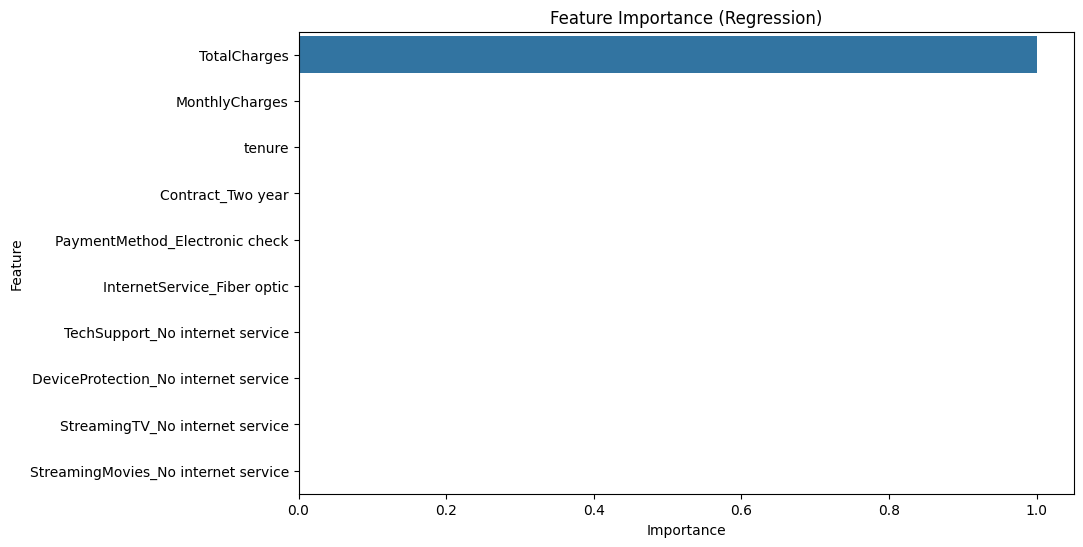

In [35]:
# Feature importance
feature_importance_reg = rf_reg.feature_importances_
importance_df_reg = pd.DataFrame({'Feature': X_reg.columns, 'Importance': feature_importance_reg})
importance_df_reg = importance_df_reg.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df_reg)
plt.title("Feature Importance (Regression)")
plt.show()